In [1]:
#importing essential packages
import numpy as np
import pandas as pd

In [2]:
#reading dataset
df=pd.read_csv('datasets_4458_8204_winequality-red.csv')

# **1)EDA**

# A.Understanding the data

In [3]:
df.shape

(1599, 12)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# **B.Visualizing**

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

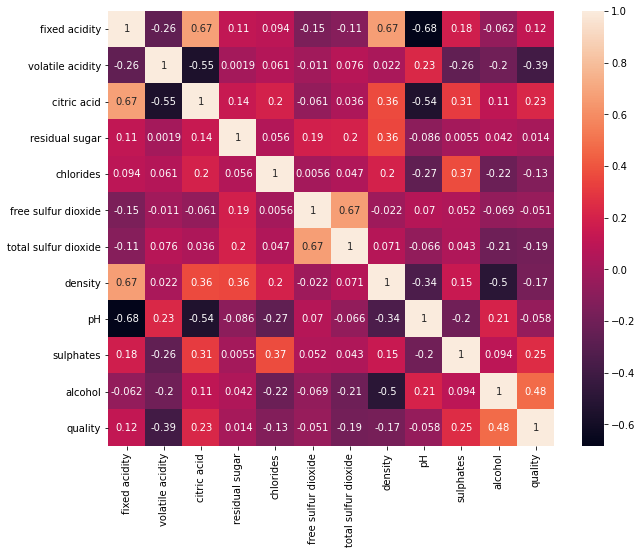

In [8]:
#Finding correlation
#Issue 1: Plot a correlation heatmap (including all columns)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [9]:
print("""THE FEATURES THAT HAVE THE HIGHEST CORRELATION WITH QUALITY ARE:

1.) alcohol

2.) volatile acidity

3.) sulphates

4.) citric acid""")

THE FEATURES THAT HAVE THE HIGHEST CORRELATION WITH QUALITY ARE:

1.) alcohol

2.) volatile acidity

3.) sulphates

4.) citric acid


UNIVARIATE ANALYSIS-HISTOGRAMS:


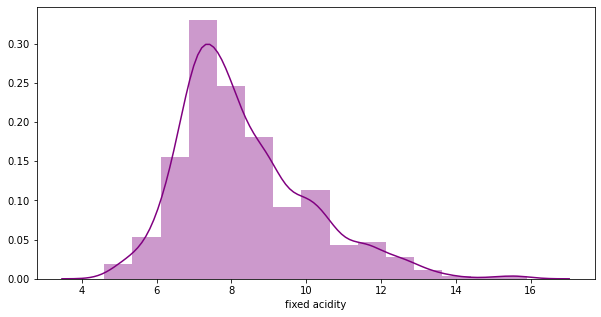

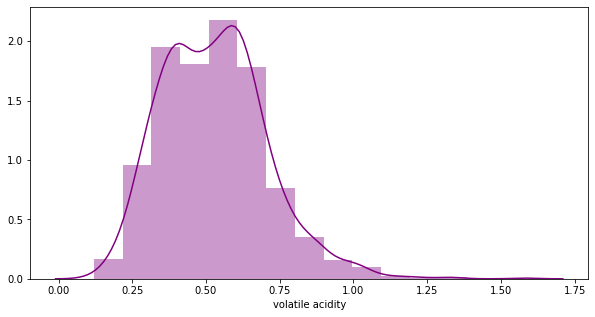

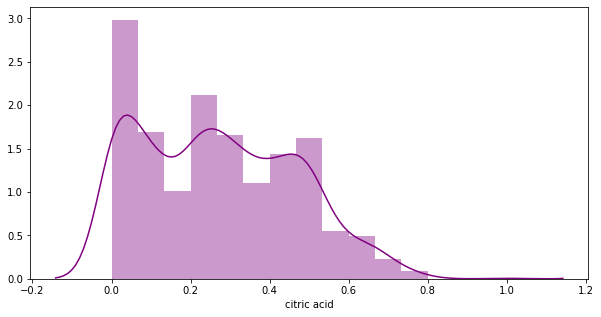

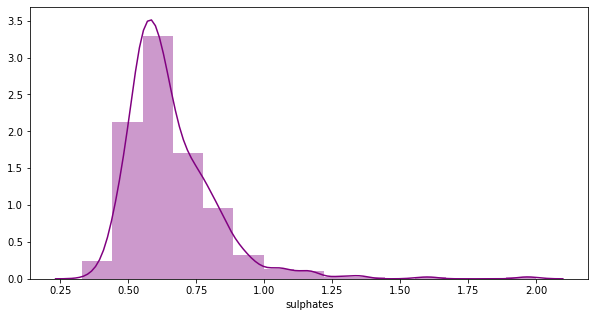

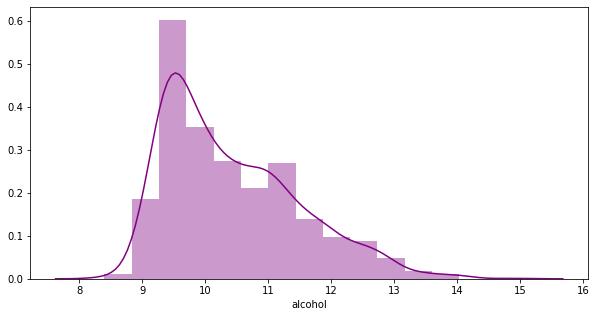

In [10]:
print("UNIVARIATE ANALYSIS-HISTOGRAMS:")
for i in [0,1,2,9,10]:
    plt.subplots(figsize=(10,5))
    sns.distplot(df.iloc[:,i],color='purple',bins=15)
    plt.show()
    

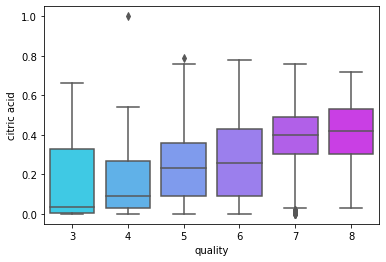

Trend: Median value of Citric acid distribution increases as Wine quality increases.


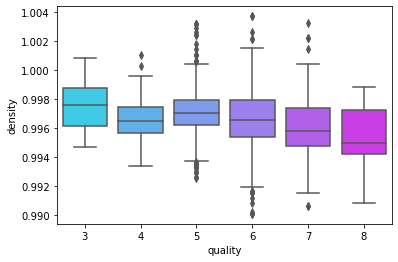

Trend: No linear trend


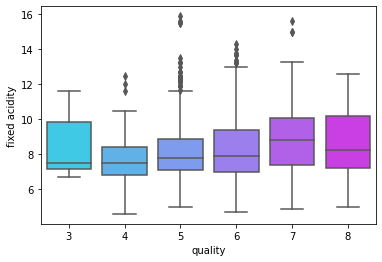

Trend: No linear trend


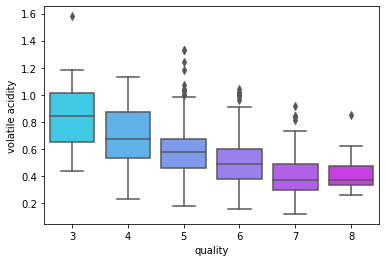

Trend: Median value of volatile acidity distribution decreases as Wine quality increases.


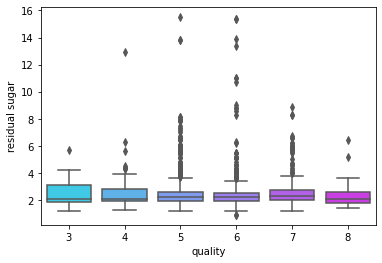

Trend: There is no particular trend , the median of residual sugar remains almost constant as the quality increases.


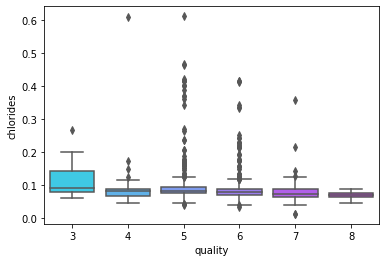

Trend: There is no particular trend , the median of chlorides remains almost constant as the quality increases.


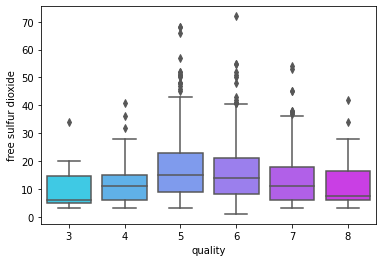

Trend: No linear trend.


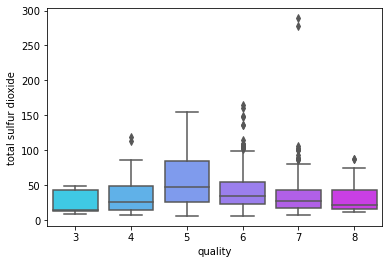

Trend: No linear trend


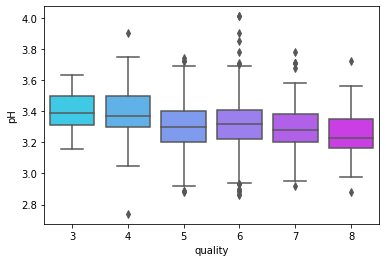

Trend: No linear trend


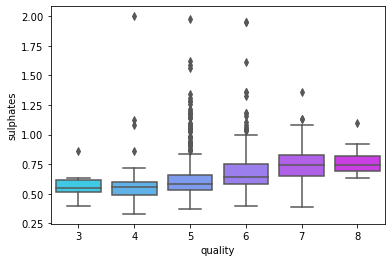

Trend: Median value of sulphates distribution increases as Wine quality increases.


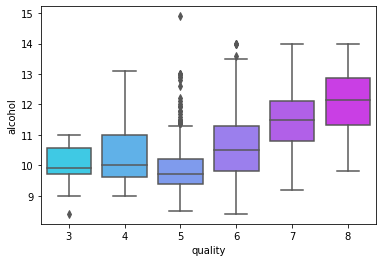

Trend: initially the median value of alcoho shows linear trend but then increases sharply the quality increases


In [11]:
#Issue 2: A boxplot has been given by the developer only for citric acid and density. Plot similar boxplots for each of the columns against quality (using the feature 'quality' as one of the axes)
#Mention if any linear trends are clearly noticeable
sns.boxplot(x=df.iloc[:,11],y = df.iloc[:,2],palette="cool")
plt.show()
print('Trend: Median value of Citric acid distribution increases as Wine quality increases.')
sns.boxplot(x=df.iloc[:,11],y = df.iloc[:,7],palette="cool")
plt.show()
print('Trend: No linear trend')
sns.boxplot(x=df.iloc[:,11],y = df.iloc[:,0],palette="cool")
plt.show()
print('Trend: No linear trend')
sns.boxplot(x=df.iloc[:,11],y = df.iloc[:,1],palette="cool")
plt.show()
print('Trend: Median value of volatile acidity distribution decreases as Wine quality increases.')
sns.boxplot(x=df.iloc[:,11],y = df.iloc[:,3],palette="cool")
plt.show()
print('Trend: There is no particular trend , the median of residual sugar remains almost constant as the quality increases.')
sns.boxplot(x=df.iloc[:,11],y = df.iloc[:,4],palette="cool")
plt.show()
print('Trend: There is no particular trend , the median of chlorides remains almost constant as the quality increases.')
sns.boxplot(x=df.iloc[:,11],y = df.iloc[:,5],palette="cool")
plt.show()
print('Trend: No linear trend.')
sns.boxplot(x=df.iloc[:,11],y = df.iloc[:,6],palette="cool")
plt.show()
print('Trend: No linear trend')
sns.boxplot(x=df.iloc[:,11],y = df.iloc[:,8],palette="cool")
plt.show()
print('Trend: No linear trend')
sns.boxplot(x=df.iloc[:,11],y = df.iloc[:,9],palette="cool")
plt.show()
print('Trend: Median value of sulphates distribution increases as Wine quality increases.')
sns.boxplot(x=df.iloc[:,11],y = df.iloc[:,10],palette="cool")
plt.show()
print('Trend: initially the median value of alcoho shows linear trend but then increases sharply the quality increases')

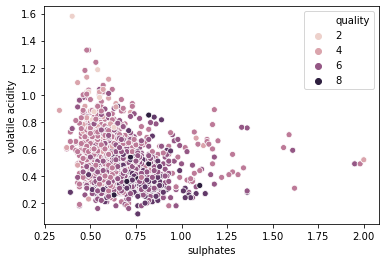

Pattern: Yes, Wine's with higher sulphates content(0.75-1.00) and lower volatile acidity(0.2-0.4) tend to have a higher quality


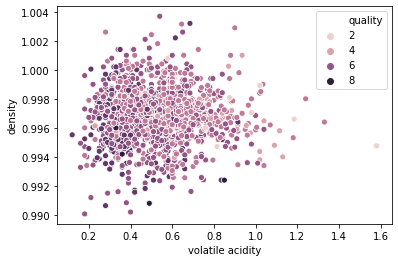

Pattern: Yes, Wine's with lower volatile acidity content(0.2-0.6) and slightly higher density(0.994-1) tend to have a higher quality


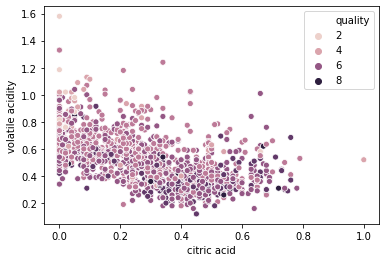

Pattern: Yes, Wine's with lower volatile acidity content(0.2-0.6) and higher citric acid(0.4-0.8) tend to have a higher quality


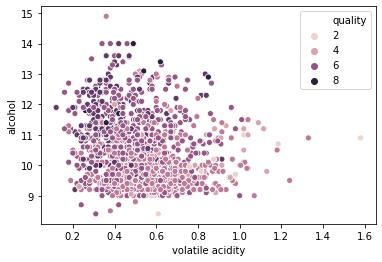

Pattern: Yes, Wine's with lower volatile acidity content(0.2-0.6) and lower alcohol content(11-14) tend to have a higher quality


In [12]:
#Issue 3: Plot scatter plots amongst the feature columns (considering all possible combinations) with the hue as "quality" and mention trends/patterns if any 
#refer to the below plot for an example:
#Drawing inferences from the most prominent data structuress

sns.scatterplot(x=df.iloc[:,9],y=df.iloc[:,1],hue=df["quality"])
plt.show()
print("Pattern: Yes, Wine's with higher sulphates content(0.75-1.00) and lower volatile acidity(0.2-0.4) tend to have a higher quality")

sns.scatterplot(x=df.iloc[:,1],y=df.iloc[:,7],hue=df["quality"])
plt.show()
print("Pattern: Yes, Wine's with lower volatile acidity content(0.2-0.6) and slightly higher density(0.994-1) tend to have a higher quality")

sns.scatterplot(x=df.iloc[:,2],y=df.iloc[:,1],hue=df["quality"])
plt.show()
print("Pattern: Yes, Wine's with lower volatile acidity content(0.2-0.6) and higher citric acid(0.4-0.8) tend to have a higher quality")

sns.scatterplot(x=df.iloc[:,1],y=df.iloc[:,10],hue=df["quality"])
plt.show()
print("Pattern: Yes, Wine's with lower volatile acidity content(0.2-0.6) and lower alcohol content(11-14) tend to have a higher quality")


# **C.Feature selection and data scaling**

In [13]:
from sklearn.neighbors import KNeighborsClassifier 
y=df.iloc[:,11]
X=df.iloc[:,[1,2,9,10]] #Using only top 4 columns with highest correlation to quality

In [14]:
#Scaling the data
#Issue number 4: Scale the data (use variable name scaler1 to define the scaler)
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
X=scaler1.fit_transform(X)

# **2.Model creation**


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41,stratify=y)

In [16]:
#Issue 5: Create a KNeighbours Classifier Model with default prameters an print the accuracy on the test data 
#use variable 'model1' to instantiate your model
model1 = KNeighborsClassifier()
model1.fit(X_train,y_train)
facc=model1.score(X_test,y_test)
print("\n\nAccuracy of final model is: ", facc*100, "%\n\n")



Accuracy of final model is:  60.62499999999999 %




In [17]:
#Issue 6: In a new cell below, improve the KNN Classifier model by tuning the parameters of the KNeighboursClassifier. Do not change any of the code above. Only a model with accuracy above 74% will be accepted.

In [18]:
model1 = KNeighborsClassifier(n_neighbors=49,weights='distance',leaf_size=30 ,p =2)
model1.fit(X_train,y_train)
facc=model1.score(X_test,y_test)
print("\n\nAccuracy of final model is: ", facc*100, "%\n\n")



Accuracy of final model is:  75.3125 %




In [19]:
#Issue 7: creating a random forest classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(random_state=42)
model2=  rf1.fit(X_train,y_train)
facc=model2.score(X_test,y_test)
print("\n\nAccuracy of final model is: ", facc*100, "%\n\n")



Accuracy of final model is:  68.75 %




In [21]:
rf2 = RandomForestClassifier(random_state=42,max_depth=70,n_estimators=500)
model2=  rf2.fit(X_train,y_train)
facc=model2.score(X_test,y_test)
print("\n\nAccuracy of final model is: ", facc*100, "%\n\n")



Accuracy of final model is:  70.625 %


